# Importing pandas into your application

In [31]:
# import numpy and pandas, and DataFrame / Series
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# And some items for matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

/Users/michaelheydt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


# Primary pandas objects

## The pandas Series

In [32]:
# create a four item Series
s = Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [33]:
# return a Series with the row with labels 1 and 3
s[[1, 3]]

1    2
3    4
dtype: int64

In [34]:
# create a series using an explicit index
s = Series([1, 2, 3, 4], 
           index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [35]:
# look up items the series having index 'a' and 'd'
s[['a', 'd']]

a    1
d    4
dtype: int64

In [36]:
# passing a list of integers to a Series that has
# non-integer index labels will look up based upon
# 0-based index like an array
s[[1, 2]]

b    2
c    3
dtype: int64

In [37]:
# get only the index of the Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [38]:
# create a Series who's index is a series of dates
# between the two specified dates (inclusive)
dates = pd.date_range('2014-07-01', '2014-07-06')
dates

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06'],
              dtype='datetime64[ns]', freq='D')

In [39]:
# create a Series with values (representing temperatures)
# for each date in the index
temps1 = Series([80, 82, 85, 90, 83, 87], 
                index = dates)
temps1

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, dtype: int64

In [40]:
# calculate the mean of the values in the Series
temps1.mean()

84.5

In [41]:
# create a second series of values using the same index
temps2 = Series([70, 75, 69, 83, 79, 77], 
                index = dates)
# the following aligns the two by their index values
# and calculates the difference at those matching labels
temp_diffs = temps1 - temps2
temp_diffs

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [42]:
# lookup a value by date using the index
temp_diffs['2014-07-03']

16

In [43]:
# and also possible by integer position as if the 
# series was an array
temp_diffs[2]

16

## The pandas DataFrame

In [44]:
# create a DataFrame from the two series objects temp1 and temp2
# and give them column names
temps_df = DataFrame(
            {'Missoula': temps1, 
             'Philadelphia': temps2})
temps_df

            Missoula  Philadelphia
2014-07-01        80            70
2014-07-02        82            75
2014-07-03        85            69
2014-07-04        90            83
2014-07-05        83            79
2014-07-06        87            77

In [45]:
# get the column with the name Missoula
temps_df['Missoula']

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [46]:
# likewise we can get just the Philadelphia column
temps_df['Philadelphia']

2014-07-01    70
2014-07-02    75
2014-07-03    69
2014-07-04    83
2014-07-05    79
2014-07-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [47]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2014-07-01            70        80
2014-07-02            75        82
2014-07-03            69        85
2014-07-04            83        90
2014-07-05            79        83
2014-07-06            77        87

In [48]:
# retrieve the Missoula column through property syntax
temps_df.Missoula

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [49]:
# calculate the temperature difference between the two cities
temps_df.Missoula - temps_df.Philadelphia

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [50]:
# add a column to temp_df which contains the difference in temps
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2014-07-01        80            70          10
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

In [51]:
# get the columns, which is also an Index object
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [52]:
# slice the temp differences column for the rows at 
# location 1 through 4 (as though it is an array)
temps_df.Difference[1:4]

2014-07-02     7
2014-07-03    16
2014-07-04     7
Freq: D, Name: Difference, dtype: int64

In [53]:
# get the row at array position 1
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2014-07-02 00:00:00, dtype: int64

In [54]:
# the names of the columns have become the index
# they have been 'pivoted'
temps_df.ix[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [55]:
# retrieve row by index label using .loc
temps_df.loc['2014-07-03']

Missoula        85
Philadelphia    69
Difference      16
Name: 2014-07-03 00:00:00, dtype: int64

In [56]:
# get the values in the Differences column in tows 1, 3 and 5
# using 0-based location
temps_df.iloc[[1, 3, 5]].Difference

2014-07-02     7
2014-07-04     7
2014-07-06    10
Freq: 2D, Name: Difference, dtype: int64

In [57]:
# which values in the Missoula column are > 82?
temps_df.Missoula > 82

2014-07-01    False
2014-07-02    False
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: Missoula, dtype: bool

In [58]:
# return the rows where the temps for Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

# Loading data from files and the web into a DataFrame

In [59]:
# display the contents of test1.csv
# which command to use depends on your OS
!cat data/test1.csv # on non-windows systems
#!type data/test1.csv # on windows systems

date,0,1,2
2000-01-01 00:00:00,1.10376250134,-1.90997889703,-0.808955536115
2000-01-02 00:00:00,1.18891664768,0.581119740849,0.86159734949
2000-01-03 00:00:00,-0.964200042412,0.779764393246,1.82906224532
2000-01-04 00:00:00,0.782130444001,-1.72066965573,-1.10824167327
2000-01-05 00:00:00,-1.86701699823,-0.528368292754,-2.48830894087
2000-01-06 00:00:00,2.56928022646,-0.471901478927,-0.835033249865
2000-01-07 00:00:00,-0.39932258251,-0.676426550985,-0.0112559158931
2000-01-08 00:00:00,1.64299299394,1.01341997845,1.43566709724
2000-01-09 00:00:00,1.14730764657,2.13799951538,0.554171306191
2000-01-10 00:00:00,0.933765825769,1.38715526486,-0.560142729978


In [60]:
# read the contents of the file into a DataFrame
df = pd.read_csv('data/test1.csv')
df

                  date         0         1         2
0  2000-01-01 00:00:00  1.103763 -1.909979 -0.808956
1  2000-01-02 00:00:00  1.188917  0.581120  0.861597
2  2000-01-03 00:00:00 -0.964200  0.779764  1.829062
3  2000-01-04 00:00:00  0.782130 -1.720670 -1.108242
4  2000-01-05 00:00:00 -1.867017 -0.528368 -2.488309
5  2000-01-06 00:00:00  2.569280 -0.471901 -0.835033
6  2000-01-07 00:00:00 -0.399323 -0.676427 -0.011256
7  2000-01-08 00:00:00  1.642993  1.013420  1.435667
8  2000-01-09 00:00:00  1.147308  2.138000  0.554171
9  2000-01-10 00:00:00  0.933766  1.387155 -0.560143

In [61]:
# the contents of the date column
df.date

0    2000-01-01 00:00:00
1    2000-01-02 00:00:00
2    2000-01-03 00:00:00
3    2000-01-04 00:00:00
4    2000-01-05 00:00:00
5    2000-01-06 00:00:00
6    2000-01-07 00:00:00
7    2000-01-08 00:00:00
8    2000-01-09 00:00:00
9    2000-01-10 00:00:00
Name: date, dtype: object

In [62]:
# we can get the first value in the date column
df.date[0]

'2000-01-01 00:00:00'

In [63]:
# it is a string
type(df.date[0])

str

In [64]:
# read the data and tell pandas the date column should be 
# a date in the resulting DataFrame
df = pd.read_csv('data/test1.csv', parse_dates=['date'])
df

        date         0         1         2
0 2000-01-01  1.103763 -1.909979 -0.808956
1 2000-01-02  1.188917  0.581120  0.861597
2 2000-01-03 -0.964200  0.779764  1.829062
3 2000-01-04  0.782130 -1.720670 -1.108242
4 2000-01-05 -1.867017 -0.528368 -2.488309
5 2000-01-06  2.569280 -0.471901 -0.835033
6 2000-01-07 -0.399323 -0.676427 -0.011256
7 2000-01-08  1.642993  1.013420  1.435667
8 2000-01-09  1.147308  2.138000  0.554171
9 2000-01-10  0.933766  1.387155 -0.560143

In [65]:
# verify the type now is date
# in pandas, this is actually a Timestamp
type(df.date[0])

pandas.tslib.Timestamp

In [66]:
# unfortunately the index is numeric which makes
# accessing data by date more complicated
df.index

RangeIndex(start=0, stop=10, step=1)

In [67]:
# read in again, now specity the data column as being the 
# index of the resulting DataFrame
df = pd.read_csv('data/test1.csv', 
                 parse_dates=['date'], 
                 index_col='date')
df

                   0         1         2
date                                    
2000-01-01  1.103763 -1.909979 -0.808956
2000-01-02  1.188917  0.581120  0.861597
2000-01-03 -0.964200  0.779764  1.829062
2000-01-04  0.782130 -1.720670 -1.108242
2000-01-05 -1.867017 -0.528368 -2.488309
2000-01-06  2.569280 -0.471901 -0.835033
2000-01-07 -0.399323 -0.676427 -0.011256
2000-01-08  1.642993  1.013420  1.435667
2000-01-09  1.147308  2.138000  0.554171
2000-01-10  0.933766  1.387155 -0.560143

In [68]:
# and the index is now a DatetimeIndex
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

In [69]:
# imports for reading data from Yahoo!
from pandas.io.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

# read the last three months of data for GOOG
goog = DataReader("GOOG",  "yahoo", 
                  date.today() + 
                  relativedelta(months=-3))

# the result is a DataFrame
#and this gives us the 5 most recent prices
goog.tail()

/Users/michaelheydt/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


                  Open        High         Low       Close   Volume  \
Date                                                                  
2017-01-23  807.250000  820.869995  803.739990  819.309998  1901600   
2017-01-24  822.299988  825.900024  817.820984  823.869995  1461000   
2017-01-25  829.619995  835.770020  825.059998  835.669983  1494500   
2017-01-26  837.809998  838.000000  827.010010  832.150024  2734400   
2017-01-27  834.710022  841.950012  820.440002  823.309998  2951800   

             Adj Close  
Date                    
2017-01-23  819.309998  
2017-01-24  823.869995  
2017-01-25  835.669983  
2017-01-26  832.150024  
2017-01-27  823.309998  

# Visualizing Data

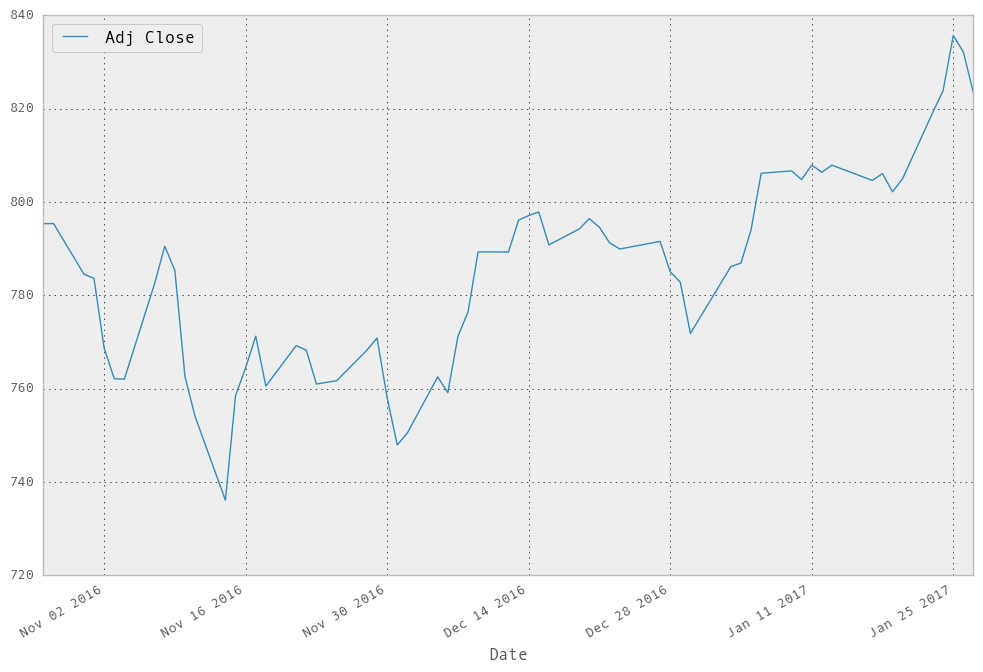

In [70]:
# plot the Adj Close values we just read in
goog.plot(y='Adj Close', figsize=(12,8));
plt.savefig('5128OS_01_02.png', bbox_inches='tight', dpi=300)